<a href="https://colab.research.google.com/github/Mburu-Elvis/NairobiRentPrices/blob/main/eda_housing_nairobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Mburu-Elvis/NairobiRentPrices/main/housing_data.csv"

In [3]:
data = pd.read_csv(url, sep=",")
data_overview = data.iloc[:120000, :]

In [4]:
data.head()

,City,Location,Bedrooms,Bathrooms,Parking,Price
0,Machakos,Syokimau/Mulolongo,4.0,4.0,NaN,100000.0
1,Westlands,Runda,3.0,3.0,2.0,180000.0
2,Nairobi,Spring Valley,5.0,5.0,4.0,380000.0
3,Nairobi,Thindigua,3.0,3.0,NaN,55000.0
4,Nairobi,Westlands,4.0,4.0,4.0,265000.0


## Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       206389 non-null  object 
 1   Location   206386 non-null  object 
 2   Bedrooms   225193 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


### City

In [6]:
data['City'].value_counts()

 Nairobi       190877
Nairobi          8075
Westlands        1143
 Mombasa          464
Nyali             232
                ...  
savanah             1
Golf's              1
Deliverance         1
EASTATE             1
Fig                 1
Name: City, Length: 448, dtype: int64

In [7]:
data['City'] = data['City'].str.strip(' ')

In [8]:
for i in range(0, 231057):
  if data['City'].iloc[i] == 'Westlands':
    data.at[i, 'City'] = 'Nairobi'
    data.at[i, 'Location'] = 'Westlands'


In [9]:
data['City'].value_counts()

Nairobi     200174
Mombasa        477
Nyali          233
West           182
B              174
             ...  
EASTATE          1
Shopping         1
Mugumo           1
Trm              1
centre           1
Name: City, Length: 429, dtype: int64

In [10]:
data.head()

,City,Location,Bedrooms,Bathrooms,Parking,Price
0,Machakos,Syokimau/Mulolongo,4.0,4.0,NaN,100000.0
1,Nairobi,Westlands,3.0,3.0,2.0,180000.0
2,Nairobi,Spring Valley,5.0,5.0,4.0,380000.0
3,Nairobi,Thindigua,3.0,3.0,NaN,55000.0
4,Nairobi,Westlands,4.0,4.0,4.0,265000.0


In [11]:
data['City'].fillna('Nairobi', inplace=True)

In [12]:
data['City'].value_counts()

Nairobi     224842
Mombasa        477
Nyali          233
West           182
B              174
             ...  
EASTATE          1
Shopping         1
Mugumo           1
Trm              1
centre           1
Name: City, Length: 429, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   206386 non-null  object 
 2   Bedrooms   225193 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


In [14]:
data.duplicated().sum()

180791

In [15]:
data.nunique().sum()

4023

In [16]:
data.describe()

,Bedrooms,Bathrooms,Parking,Price
count,225193.000000,2.219260e+05,1.070610e+05,2.309420e+05
mean,13.236788,1.256053e+02,2.430523e+01,8.868090e+05
std,1573.673088,4.934712e+04,3.502559e+03,5.224872e+07
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000,2.000000e+00,2.000000e+00,8.000000e+04
50%,3.000000,3.000000e+00,2.000000e+00,1.500000e+05
75%,4.000000,4.000000e+00,3.000000e+00,2.800000e+05
max,360000.000000,2.323232e+07,1.121111e+06,1.550006e+10


## Location


In [17]:
data['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Location
Non-Null Count   Dtype 
--------------   ----- 
206386 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [18]:
data['Location'] = data['Location'].str.strip(' ,')

In [19]:
data['Location'].value_counts()

Lavington     35962
Kilimani      26167
Westlands     25451
Kileleshwa    20980
Runda         12770
              ...  
ONGATA            1
Muthithi          1
Green Park        1
State             1
GREENFIELD        1
Name: Location, Length: 742, dtype: int64

In [20]:
data['Location'].mode()

0    Lavington
Name: Location, dtype: object

In [21]:
impute_value = data['Location'].mode().iloc[0]

data['Location'].fillna(impute_value, inplace=True)

In [22]:
data['Location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Location
Non-Null Count   Dtype 
--------------   ----- 
231057 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


## Bedrooms

In [23]:
data['Bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bedrooms
Non-Null Count   Dtype  
--------------   -----  
225193 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [24]:
data['Bedrooms'].isna().sum()

5864

In [25]:
data['Bedrooms'].describe()

count    225193.000000
mean         13.236788
std        1573.673088
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max      360000.000000
Name: Bedrooms, dtype: float64

In [26]:
data['Bedrooms'].fillna(data['Bedrooms'].median(), inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   231057 non-null  object 
 2   Bedrooms   231057 non-null  float64
 3   Bathrooms  221926 non-null  float64
 4   Parking    107061 non-null  float64
 5   Price      230942 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


<Axes: >

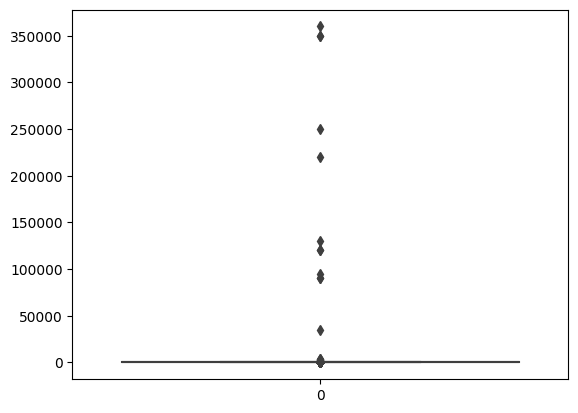

In [28]:
sns.boxplot(data['Bedrooms'])

In [29]:
from matplotlib.ticker import ScalarFormatter

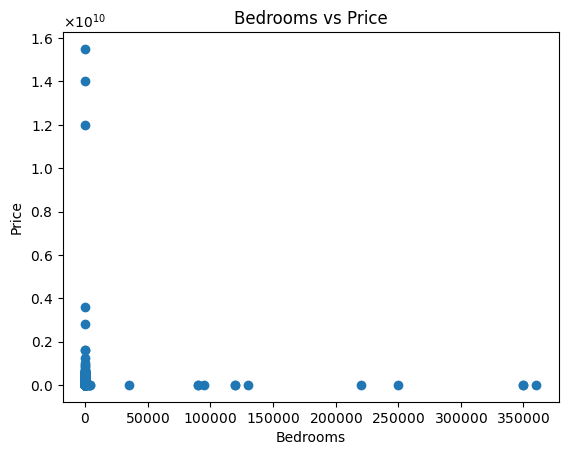

In [30]:
plt.scatter(data['Bedrooms'], data['Price'])
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()

In [31]:
data['Bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bedrooms
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [32]:
Q1 = np.percentile(data['Bedrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bedrooms'], 75, method='midpoint')

IQR = Q3 -  Q1
print(Q1, Q3)

2.0 4.0


In [33]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.array(data['Bedrooms'] >= upper)
lower_array = np.array(data['Bedrooms'] <= lower)

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

-1.0 7.0
Lower bond values 0, Upper bond values 1902


In [34]:
data['Bedrooms'].median()

3.0

In [35]:
upper_array

array([False, False, False, ..., False, False, False])

In [36]:
np.unique(upper_array)

array([False,  True])

In [37]:
data.loc[upper_array, 'Bedrooms'] = data['Bedrooms'].median()

In [38]:
data['Bedrooms'].describe()

count    231057.000000
mean          3.234250
std           1.249039
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: Bedrooms, dtype: float64

<Axes: >

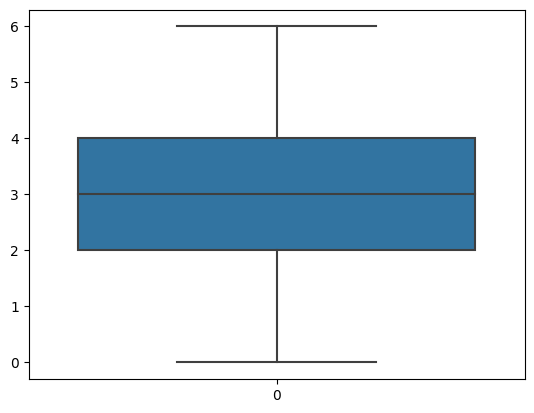

In [39]:
sns.boxplot(data['Bedrooms'])

## Bathrooms

In [40]:
data['Bathrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bathrooms
Non-Null Count   Dtype  
--------------   -----  
221926 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [41]:
data['Bathrooms'].fillna(data['Bathrooms'].median(), inplace=True)

In [42]:
data['Bathrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Bathrooms
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [43]:
data['Bathrooms'].describe()

count    2.310570e+05
mean     1.207602e+02
std      4.836223e+04
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      2.323232e+07
Name: Bathrooms, dtype: float64

<Axes: >

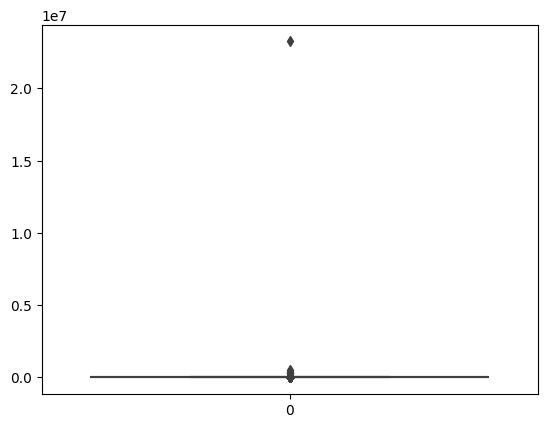

In [44]:
sns.boxplot(data['Bathrooms'])

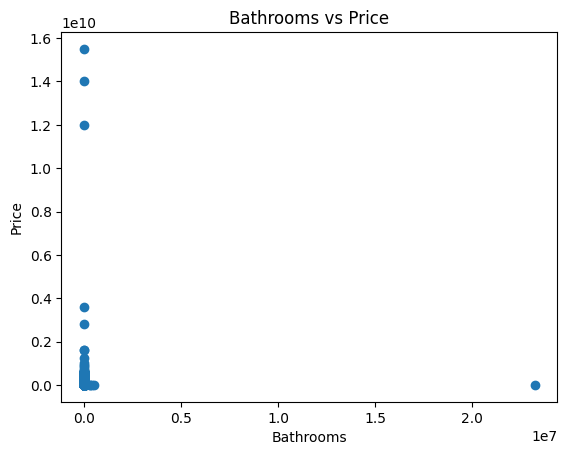

In [45]:
plt.scatter(data['Bathrooms'], data['Price'])
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [46]:
Q1 = np.percentile(data['Bathrooms'], 25, method='midpoint')
Q3 = np.percentile(data['Bathrooms'], 75, method='midpoint')

IQR = Q3 - Q1

In [47]:
upper =  Q3 + 1.5 * IQR
lower =   Q1 - 1.5 * IQR
upper_array = np.array(data['Bathrooms'] >= upper)
lower_array = np.array(data['Bathrooms'] <= lower)

print(lower, upper)
print(f'Lower bond values {lower_array.sum()}, Upper bond values {upper_array.sum()}')

-1.0 7.0
Lower bond values 0, Upper bond values 4996


In [48]:
data.loc[upper_array, 'Bathrooms'] = data['Bathrooms'].median()

In [49]:
data['Bathrooms'].describe()

count    231057.00000
mean          3.20578
std           1.34054
min           0.00000
25%           2.00000
50%           3.00000
75%           4.00000
max           6.00000
Name: Bathrooms, dtype: float64

<Axes: >

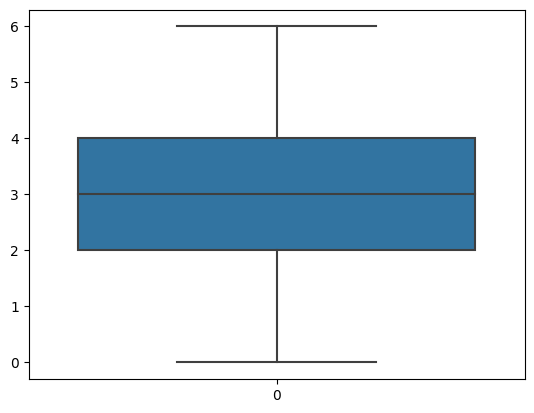

In [50]:
sns.boxplot(data['Bathrooms'])

## Parking

In [51]:
data['Parking'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Parking
Non-Null Count   Dtype  
--------------   -----  
107061 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [52]:
data['Parking'].value_counts()

2.0          65841
3.0          14380
1.0           9379
4.0           9306
5.0           4778
             ...  
310.0            1
789.0            1
85.0             1
750.0            1
1121111.0        1
Name: Parking, Length: 258, dtype: int64

In [53]:
data['Parking'].describe()

count    1.070610e+05
mean     2.430523e+01
std      3.502559e+03
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.121111e+06
Name: Parking, dtype: float64

<Axes: >

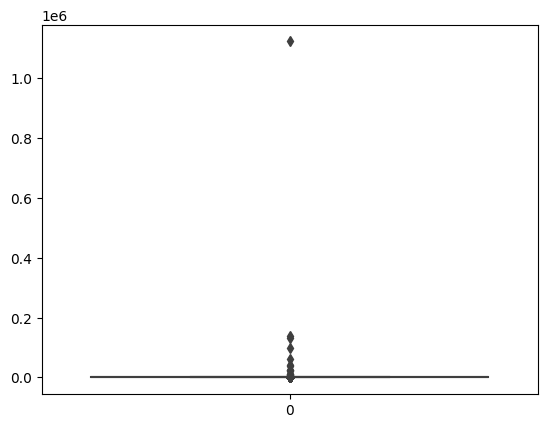

In [54]:
sns.boxplot(data['Parking'])

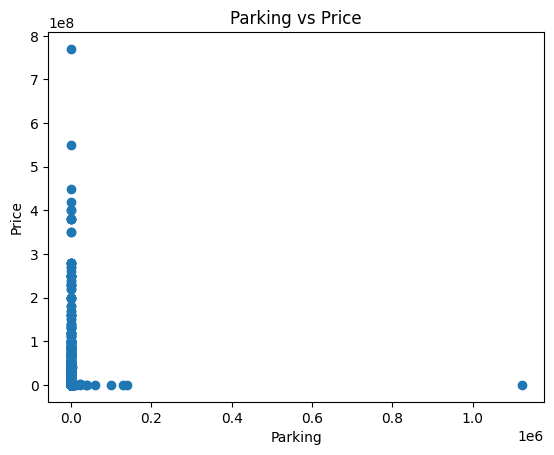

In [55]:
plt.scatter(data['Parking'], data['Price'])
plt.title('Parking vs Price')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()

In [56]:
mode_parking = data['Parking'].mode().values[0]
print(mode_parking)

2.0


In [57]:

for idx, val in enumerate(data['Parking']):
  if pd.isnull(val):
    if data.at[idx, 'Bedrooms']:
      data.at[idx, 'Parking'] = 0
    else:
      data.at[idx, 'Parking'] = mode_parking

In [58]:
data['Parking'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Parking
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [59]:
data['Parking'].value_counts()

0.0          124447
2.0           65851
3.0           14380
1.0            9379
4.0            9306
              ...  
310.0             1
789.0             1
85.0              1
750.0             1
1121111.0         1
Name: Parking, Length: 258, dtype: int64

In [60]:
Q1 = np.percentile(data['Parking'], 25, method='midpoint')
Q3 = np.percentile(data['Parking'], 75, method='midpoint')

IQR = Q3 - Q1
print(IQR)

2.0


In [61]:
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

upper_array = np.array(data['Parking'] >= upper)
lower_array = np.array(data['Parking'] <= lower)

print(lower, upper)
print(f'Sum of values less than lower bound{lower_array.sum()} and those greater than upper bound {upper_array.sum()}')

-3.0 5.0
Sum of values less than lower bound0 and those greater than upper bound 7694


In [62]:
data.loc[upper_array, 'Parking'] = data['Parking'].median()

In [63]:
data['Parking'].describe()

count    231057.000000
mean          0.958400
std           1.211032
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           4.000000
Name: Parking, dtype: float64

In [64]:
data['Parking'].value_counts()

0.0    132141
2.0     65851
3.0     14380
1.0      9379
4.0      9306
Name: Parking, dtype: int64

## Price

In [65]:
data['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Price
Non-Null Count   Dtype  
--------------   -----  
230942 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [66]:
data['Price'].value_counts()

250000.0     13528
350000.0     10986
150000.0     10687
200000.0     10084
300000.0      9781
             ...  
418800.0         1
231710.0         1
221445.0         1
1057000.0        1
89996.0          1
Name: Price, Length: 1741, dtype: int64

In [67]:
data['Price'].describe()

count    2.309420e+05
mean     8.868090e+05
std      5.224872e+07
min      0.000000e+00
25%      8.000000e+04
50%      1.500000e+05
75%      2.800000e+05
max      1.550006e+10
Name: Price, dtype: float64

In [68]:
data['Price'].isnull().sum()

115

In [69]:
data['Price'].fillna(data['Price'].median(), inplace=True)
print(data['Price'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 231057 entries, 0 to 231056
Series name: Price
Non-Null Count   Dtype  
--------------   -----  
231057 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB
None


<Axes: >

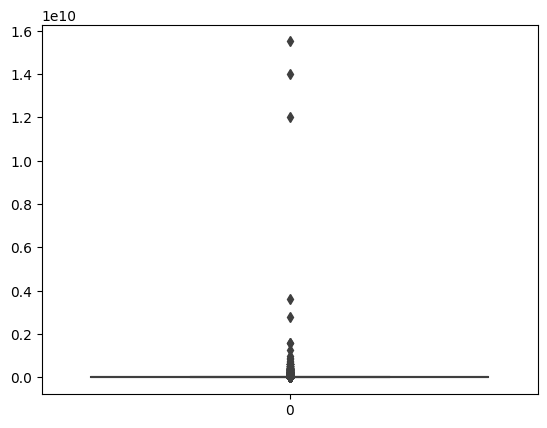

In [70]:
sns.boxplot(data['Price'])

In [71]:
Q1 = np.percentile(data['Price'], 25, method='midpoint')
Q3 = np.percentile(data['Price'], 75, method='midpoint')

IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Q1: 80000.0, Q3: 280000.0, IQR: 200000.0


In [72]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower, upper)

-220000.0 580000.0


In [73]:
upper_array = np.array(data['Price'] >= upper)
lower_array = np.array(data['Price'] <= lower)

In [74]:
print(len(lower_array), len(upper_array))

231057 231057


In [75]:
data['Price'].median()

150000.0

In [76]:
data.loc[lower_array, 'Price'] = data['Price'].median()
data.loc[upper_array, 'Price'] = data['Price'].median()

In [77]:
data['Price'].describe()

count    231057.000000
mean     179259.512341
std      122274.723709
min           0.000000
25%       80000.000000
50%      150000.000000
75%      250000.000000
max      579800.000000
Name: Price, dtype: float64

<Axes: >

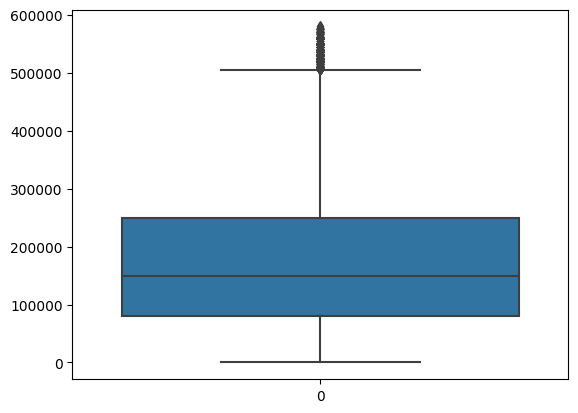

In [78]:
sns.boxplot(data['Price'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231057 entries, 0 to 231056
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   City       231057 non-null  object 
 1   Location   231057 non-null  object 
 2   Bedrooms   231057 non-null  float64
 3   Bathrooms  231057 non-null  float64
 4   Parking    231057 non-null  float64
 5   Price      231057 non-null  float64
dtypes: float64(4), object(2)
memory usage: 10.6+ MB


## Univariate Analysis

## Distributions

### Bedrooms

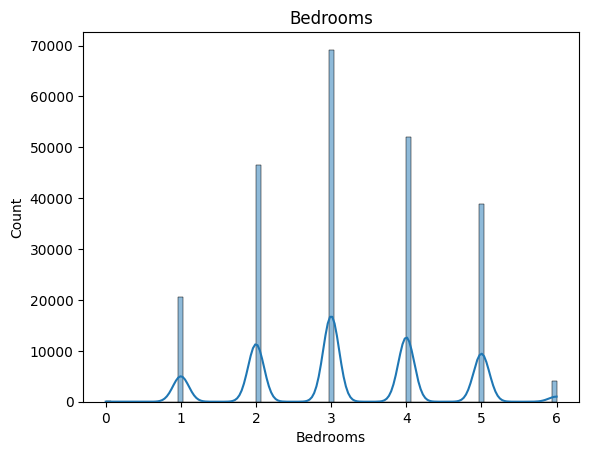

In [80]:
sns.histplot(data=data['Bedrooms'], kde=True)
plt.title("Bedrooms")
plt.show()

From this graph we can see that the bedrooms column has a normal distribution.

Houses in Nairobi have a range of bedrooms from 0-6.
A house with 0 bedroom? Yes, this are the studio houses and the single room houses, they are just one room with no separate room as a bedroom.

In [81]:
data[data['Bedrooms'] >= 4][['Location', 'Bedrooms']].value_counts()

Location                                            Bedrooms
Lavington                                           5.0         14432
                                                    4.0         14206
Runda                                               5.0          6523
Westlands                                           4.0          5001
Runda                                               4.0          4145
                                                                ...  
Mountain                                            5.0             1
Mtwapa                                              4.0             1
Mutero                                              4.0             1
3rd                                                 5.0             1
ð¨ðð ðð¡ð¢ð¤ð ðð¨ðð  4.0             1
Length: 290, dtype: int64

Most of the houses have a range of 0-5 bedrooms which is pretty much a considerable number for bedrooms. This range captures most of the preferences by tenants. This ranges from those who are starting out in life and have a small family or has no family to those customers who have a large family.
There might be a catch with those tenants who live in studio/singe room houses, They might be starting out in life and have no families or they have a low income thus pushing them to live in smaller houses than the one they'd be comfortable with.
With that, who is living in houses with 4, 5, 6 bedrooms?. Most of the houses with such a number of bedrooms are in rich neighborhoods in Nairobi. Such locations that are generally for the rich are `Lavington, Runda, Westlands etc`. There are other houses in other locations which are generally not for high income earners geographically but may have rich neighborhoods too.These houses are occupied by tenants with a really good source of income, think of big company CEOs, celebrities, politicians and other top tier earners.

In [82]:
data[data['Bedrooms'] == 3]['Price']

1         180000.0
3          55000.0
12         95000.0
14         85000.0
15        100000.0
            ...   
231045    180000.0
231046    180000.0
231050    180000.0
231051    180000.0
231052    180000.0
Name: Price, Length: 69184, dtype: float64

Houses with 3 bedrooms are the most to find in Nairobi. Why is this so? It maybe because it's the most preferred by tenants who have a large family and want a master bedroom, a bedrooms for their kids and a guest bedroom.
This may lead to many landlords adhere to this demand and build more houses with 3 bedrooms.
These houses with 3 bedrooms have quite a wide price range accomodating tenants with different income levels. However, most of the houses with this number of bedrooms target middle class to top tier income earners since their mean price is around KSh 140,000.

## Bathrooms

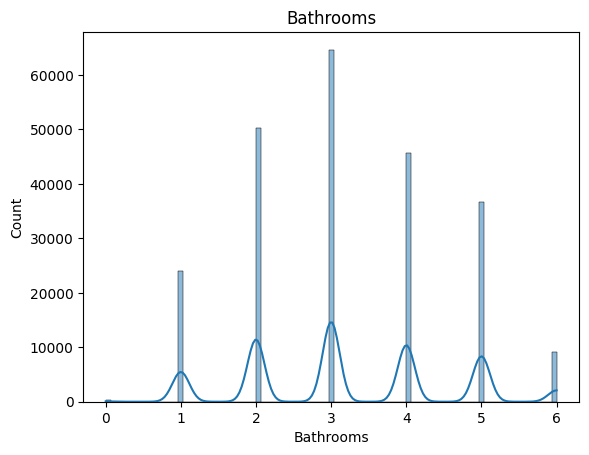

In [83]:
sns.histplot(data=data['Bathrooms'], kde=True)
plt.title('Bathrooms')
plt.show()

Referring to the graph, we draw various insights from it. Let's uncover some of them.

The `Bathrooms` of houses is normally distributed.

Most houses have 3 bathrooms.
The range of number of bathrooms is 0-6.
A house can have no bathroom if it's a single room, also some one bedrooms have no bathrooms. Here is a catch, does this mean people living there don't have their showers😀? No, such houses have shared bathrooms.

For most standard  houses 3 bathrooms are quite enough. But there are houses with more bathrooms. This is attributed to the size of the house and the number of rooms in the house. Of course houses with such a large number of bathrooms are not for the larger majority of the population. This is for the wealthy and money is not a problem as we'll see when we compare `Bathrooms` with `Price`, `Bedrooms` and `Location`.
However, if you look at the current frequency for the houses with such a large number of bathrooms, it is larger than the for those with 0, 1 and 2 bathrooms.
Here is why, most of the houses in Nairobi are not uploaded online from where most of the data was scrapped. Also, majority of the settlements where people within the lower end of the income are not advertised online. Most people who live in the outskirts of Nairobi and live in areas such as Dandora, Githurai and the likes don't look for houses online but rather through word of mouth and the famous `house hunting` day. Again, most of these houses were not scrapped during the data collection but they are represented.

In [84]:
data[data['Bathrooms'] >= 4][['Location', 'Bathrooms']].value_counts()

Location                                            Bathrooms
Lavington                                           5.0          12626
                                                    4.0          12307
Runda                                               5.0           5931
Westlands                                           4.0           4879
Kilimani                                            4.0           3740
                                                                 ...  
Membley Estate                                      5.0              1
Mimosa                                              5.0              1
Miotoni                                             5.0              1
Mombasa                                             4.0              1
ð¨ðð ðð¡ð¢ð¤ð ðð¨ðð  4.0              1
Length: 303, dtype: int64

From the results, above we can infer that majority of the houses that have more than 3 bathrooms are in rich neighborhoods such as `Membly Estate, Lavington, Runda etc`. Most of these houses are in `Lavington`, which by all means is a rich neighborhood in Nairobi. This large number of bathrooms is convinient to be present in large houses that the rich can afford. These houses can be mansions, bungalows in these rich neighborhoods. It'd be illogical to have have a one bedroom house with 3, 4 bathrooms. They are highly directly correlated, thus a large number of bedrooms corresponds to a large number of bathrooms.

We'll affirm this when we look at the correlation matrix for the various columns in the dataset and also during the multivariate analysis.

## Parking

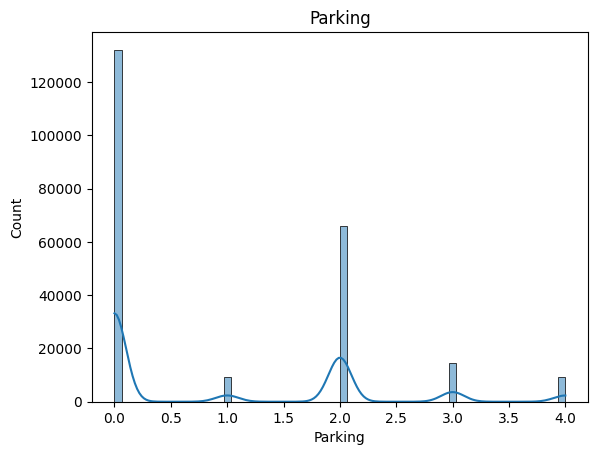

In [85]:
sns.histplot(data=data['Parking'], kde=True)
plt.title('Parking')
plt.show()

In reference to the above graph, most of the houses don't have a parking a parking. Fewer houses have 1 parking space.
The parking slots range from 0-4.

In [86]:
data['Parking'].mean()

0.9583998753554318

The mean parking slots is approximately 1. This is greately pulled by the houses with no parking.
Houses with no parking? Right, majority of the houses in the lower tier earners and most of the studio/single room houses and one bedroom houses may have no parking.
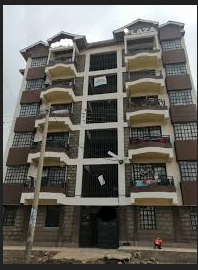

These houses are more common for a larger demographic in Nairobi than standard apartments. This may lure developers and landlords to build such houses and tap a larger customer base rather than developing high end houses for only a small section of the demographic.

In [91]:
data[data['Parking'] >= 3][['Location', 'Parking']].value_counts()

Location       Parking
Lavington      3.0        4222
               4.0        2766
Runda          3.0        1658
Kitisuru       3.0        1182
Runda          4.0        1158
                          ... 
Olorropil      3.0           1
Ongata Rongai  4.0           1
Roysambu       4.0           1
Ruai           3.0           1
Woodley        3.0           1
Length: 131, dtype: int64

We can see that the houses with a more than 2 parking slots are majorly more common in porshy areas such as `Kitisuru` whose residents are the who is who's.
These houses have a higher number of parking slots since the residents are people who are rich and thus have more than 1 car in their names. These house are mostly mansions and have their own compound thus allowing such a large number of parking slots.
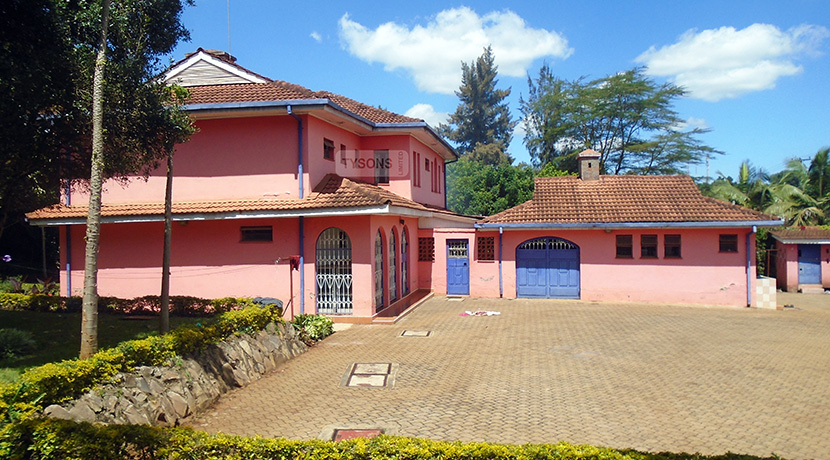

### Price

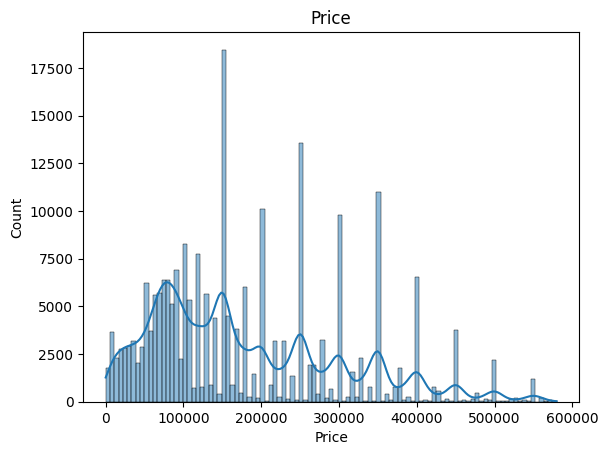

In [87]:
sns.histplot(data=data['Price'], kde=True)
plt.title("Price")
plt.show()

In [88]:
data['Price'].describe()

count    231057.000000
mean     179259.512341
std      122274.723709
min           0.000000
25%       80000.000000
50%      150000.000000
75%      250000.000000
max      579800.000000
Name: Price, dtype: float64

In [89]:
data[data['Price']== 0].value_counts()

City     Location    Bedrooms  Bathrooms  Parking  Price
Nairobi  Kileleshwa  0.0       0.0        0.0      0.0      1
         Kilimani    0.0       0.0        0.0      0.0      1
         Lavington   0.0       0.0        0.0      0.0      1
         Westlands   0.0       0.0        0.0      0.0      1
dtype: int64

## Bivariate Analysis

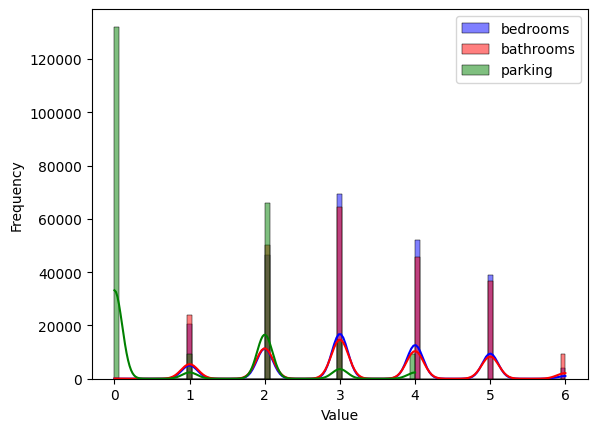

In [90]:
sns.histplot(data['Bedrooms'], kde=True,label='bedrooms', color='blue', alpha=0.5)
sns.histplot(data['Bathrooms'], kde=True,label='bathrooms', color='red', alpha=0.5)
sns.histplot(data['Parking'], kde=True, label='parking', color='green', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()